#RANDOM FOREST

#Exploratory Data Analysis (EDA):


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_excel("/content/glass.xlsx",sheet_name="glass")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [ ]:
# Calculate the IQR for each numerical column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = df[(df < lower_bound) | (df > upper_bound)].dropna(how='all')

print("Potential Outliers:")
display(outliers)

Potential Outliers:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.26,NaN
21,NaN,NaN,NaN,0.29,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,NaN,NaN
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11,NaN,NaN
38,NaN,NaN,NaN,0.47,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
209,NaN,NaN,NaN,2.88,NaN,NaN,NaN,1.06,NaN,7.0
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.59,NaN,7.0
211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.64,NaN,7.0
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.57,NaN,7.0


In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

print("Duplicate Rows:")
display(duplicate_rows)

Duplicate Rows:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


#Data Visualizations

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>]], dtype=object)

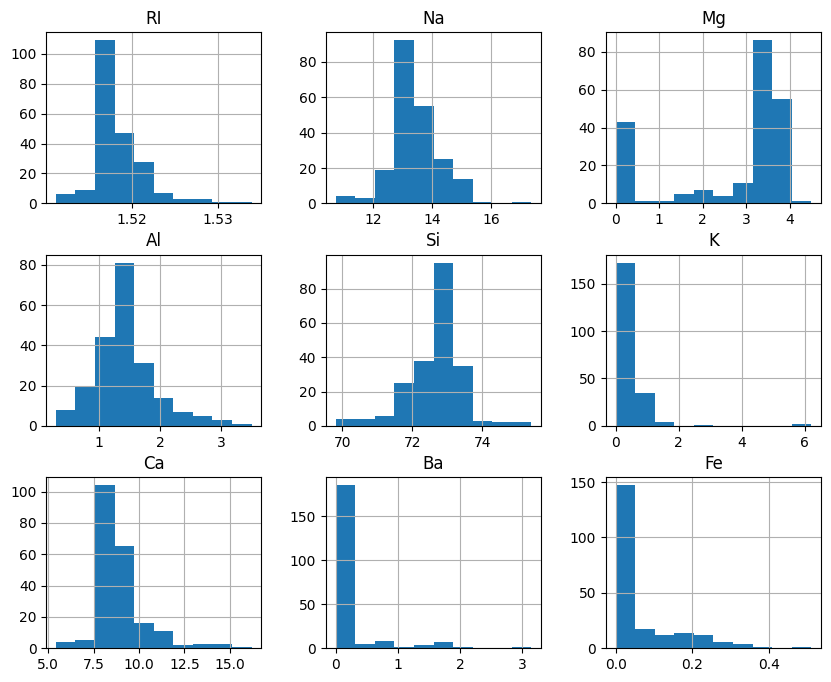

In [ ]:
#histograms
numerical_cols=df.select_dtypes(include=['float64'])
numerical_cols.hist(figsize=(10, 8))

<Axes: xlabel='Type'>

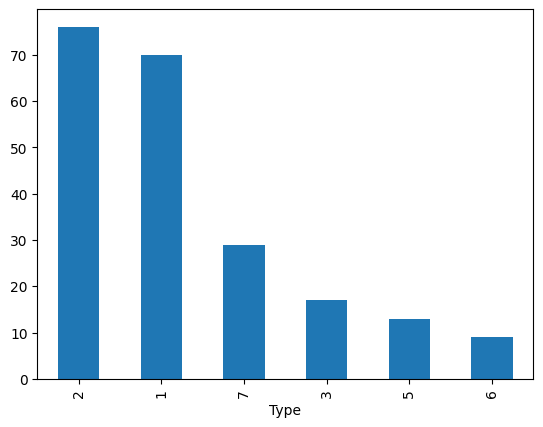

In [ ]:
#bar graph
df['Type'].value_counts().plot(kind='bar')

<Axes: >

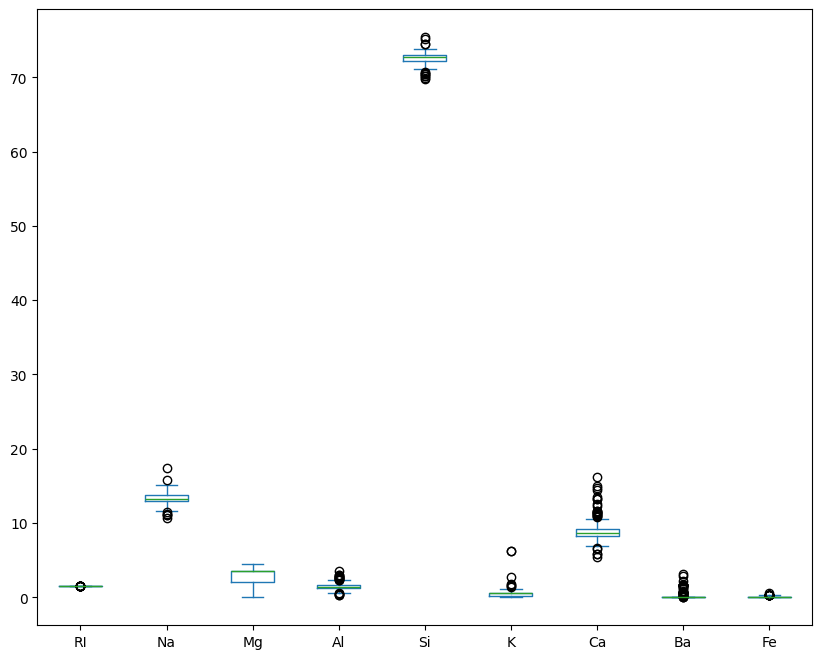

In [ ]:
#box plots
numerical_cols.plot(kind='box', figsize=(10, 8))

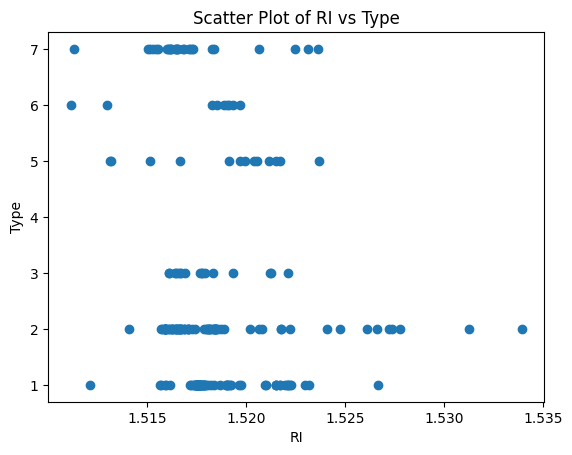

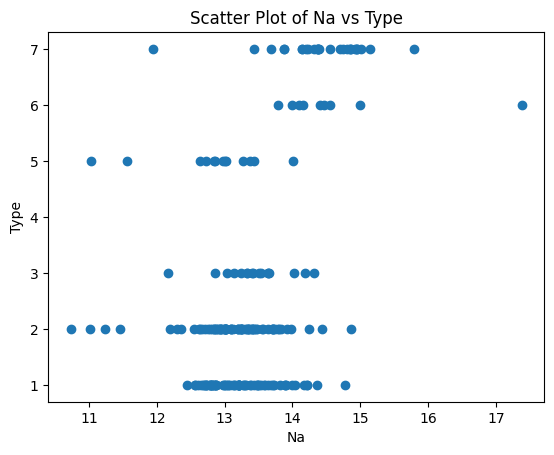

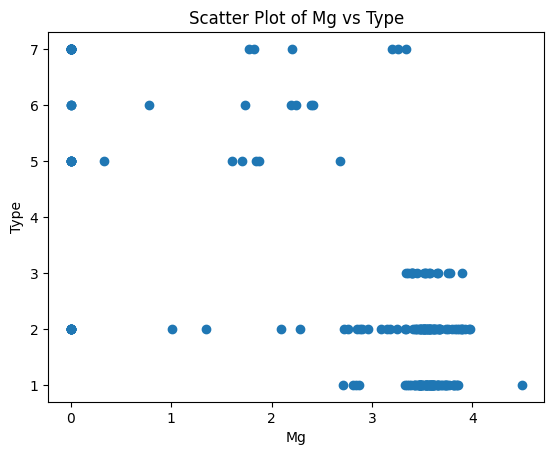

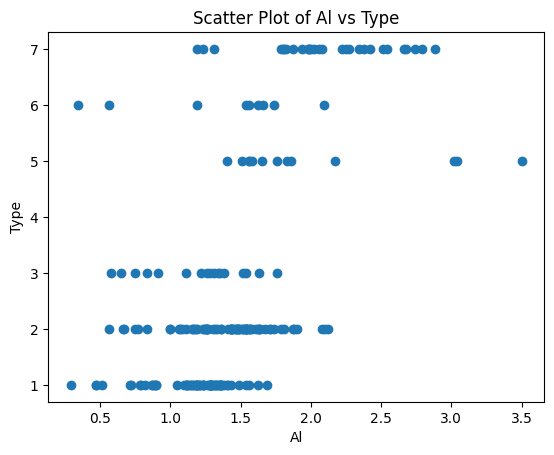

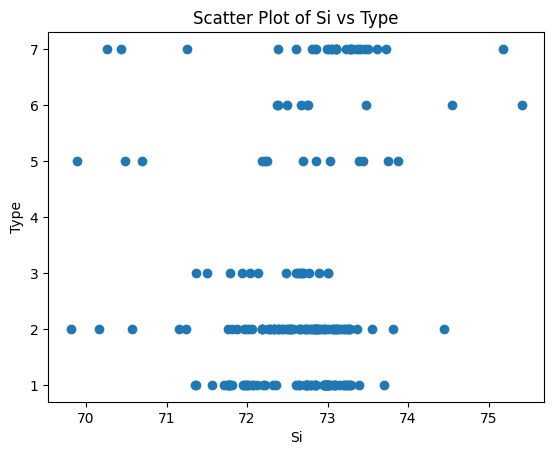

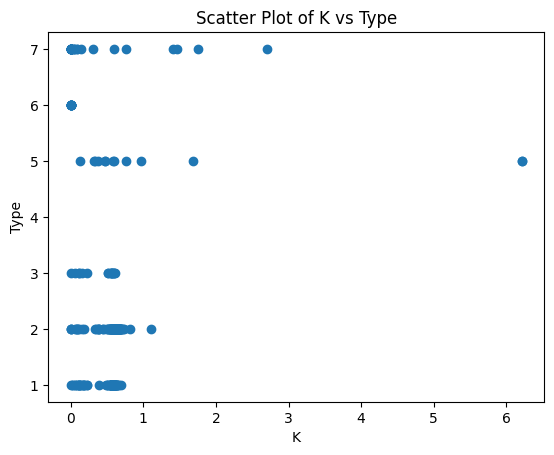

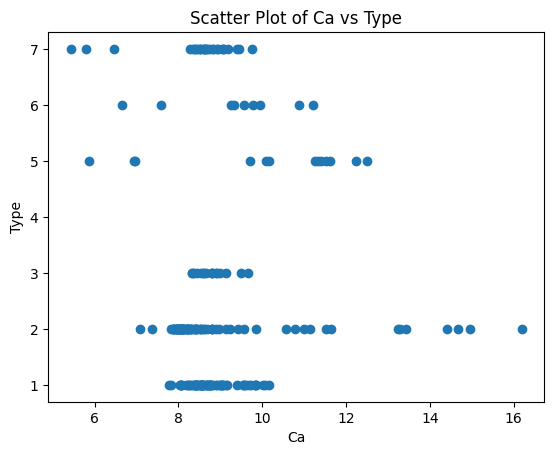

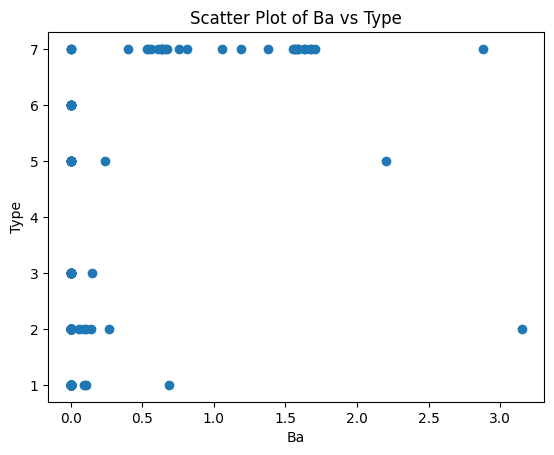

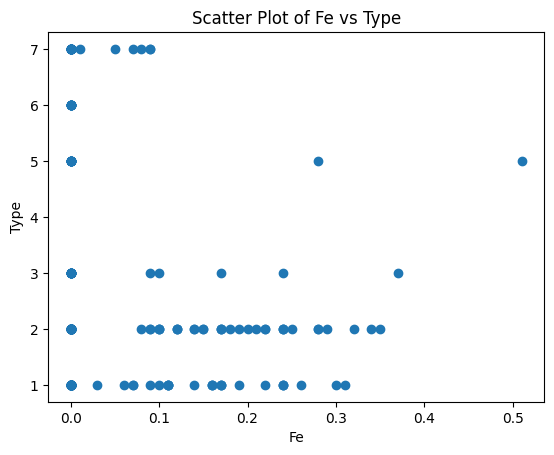

In [ ]:
#scatter plots
import matplotlib.pyplot as plt
col=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
for i in col:
  plt.scatter(df[i],df['Type'])
  plt.xlabel(i)
  plt.ylabel('Type')
  plt.title(f'Scatter Plot of {i} vs Type')
  plt.show()

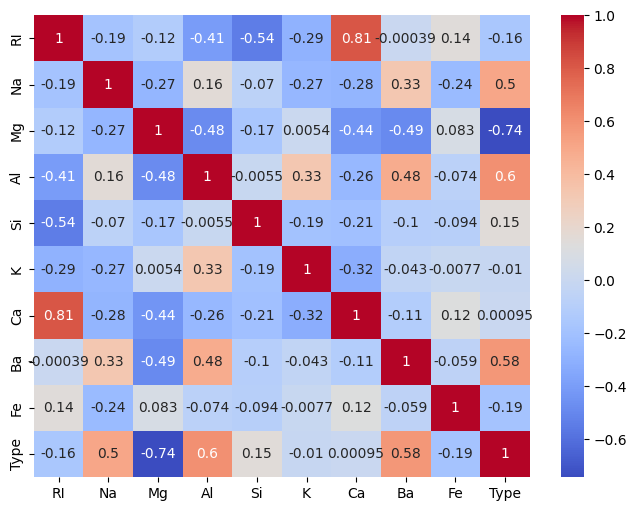

In [ ]:
#correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix=df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#Data Preprocessing

In [ ]:
#deleting duplicate rows
df = df.drop_duplicates()
print("DataFrame after removing duplicate rows:")
display(df)

DataFrame after removing duplicate rows:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
#removing outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("DataFrame after removing outliers:")
display(df)

DataFrame after removing outliers:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
176,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.0,6
177,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0,6
178,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6


In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('Type', axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])
df_scaled['Type'] = df['Type'].values # Assign the 'Type' column values from the df after outlier removal
print("Standardized DataFrame:")
display(df_scaled)

Standardized DataFrame:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.835794,0.832792,1.951940,-0.879521,-1.873977,-2.077398,0.210063,0.0,-0.598819,1
1,-0.147828,1.348359,0.335031,0.057504,0.075285,-0.090110,-1.254994,0.0,-0.598819,1
2,-0.982116,0.605943,0.244193,0.706214,0.608767,-0.515957,-1.334617,0.0,-0.598819,1
3,-0.118657,-0.053983,0.498538,-0.194772,-0.170938,0.335738,-0.633937,0.0,-0.598819,1
4,-0.258677,0.069753,0.371366,-0.374969,0.793434,0.241105,-0.872805,0.0,-0.598819,1
...,...,...,...,...,...,...,...,...,...,...
131,0.692294,1.575209,-1.863240,0.778293,-0.663383,-2.361296,1.515875,0.0,-0.598819,6
132,0.878988,1.142132,-1.826905,-0.555166,0.136841,-2.361296,1.834366,0.0,-0.598819,6
133,0.248896,2.523852,-2.135753,0.994529,-0.642864,-2.361296,1.022215,0.0,-0.598819,6
134,0.383083,1.760813,-2.226591,1.138687,-0.047826,-2.361296,1.117762,0.0,-0.598819,6


#Random Forest Model Implementation


In [ ]:
#data partition
X=df_scaled.drop('Type',axis=1)
Y=df_scaled['Type']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42,max_samples=0.8,max_features=0.7)
rf_classifier.fit(X_train, Y_train)

y_pred_train_rf = rf_classifier.predict(X_train) # 280 samples (224+56)
y_pred_test_rf = rf_classifier.predict(X_test)

# Define all possible labels from the original dataframe
all_labels = sorted(df['Type'].unique())

# Calculate accuracy
accuracy_train_rf = accuracy_score(Y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(Y_test, y_pred_test_rf)

# Calculate log loss with explicit labels
logloss_train_rf = log_loss(Y_train, rf_classifier.predict_proba(X_train), labels=all_labels)
logloss_test_rf = log_loss(Y_test, rf_classifier.predict_proba(X_test), labels=all_labels)

# Print the results
print(f"Training Accuracy: {accuracy_train_rf:.4f}")
print(f"Testing Accuracy: {accuracy_test_rf:.4f}")
print(f"Training Log Loss: {logloss_train_rf:.4f}")
print(f"Testing Log Loss: {logloss_test_rf:.4f}")

Training Accuracy: 0.9907
Testing Accuracy: 0.7143
Training Log Loss: 0.1997
Testing Log Loss: 0.6040


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.6, 0.7, 0.8],
    'max_features': [0.6, 0.7, 0.8]
}

# Create the bagging classifier with a decision tree estimator
rf_model = RandomForestClassifier(random_state=42) # Removed n_estimators, max_samples, max_features as they are in param_grid

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy') # Changed cv to 5

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_pred_test)
print("Test accuracy:", test_accuracy)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_features': 0.8, 'max_samples': 0.7, 'n_estimators': 200}
Best score: 0.7965367965367965
Test accuracy: 0.7142857142857143


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss

# Bagging Classifier
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini'),
                                  n_estimators=100, random_state=42,
                                  max_samples=0.6,max_features=0.7)
bagging_model.fit(X_train, Y_train)

y_pred_train_bagging = bagging_model.predict(X_train)
y_pred_test_bagging = bagging_model.predict(X_test)

# Get predicted probabilities for log loss calculation
y_prob_train_bagging = bagging_model.predict_proba(X_train)
y_prob_test_bagging = bagging_model.predict_proba(X_test)

# Define all possible labels from the original dataframe
all_labels = sorted(df['Type'].unique())

training_accuracy_bagging = accuracy_score(Y_train, y_pred_train_bagging)
test_accuracy_bagging = accuracy_score(Y_test, y_pred_test_bagging)

# Calculate log loss with explicit labels and predicted probabilities
training_loss_bagging = log_loss(Y_train, y_prob_train_bagging, labels=all_labels)
test_loss_bagging = log_loss(Y_test, y_prob_test_bagging, labels=all_labels)


print("Bagging - Training Accuracy:", training_accuracy_bagging)
print("Bagging - Test Accuracy:", test_accuracy_bagging)
print("Bagging - Training Loss:", training_loss_bagging)
print("Bagging - Test Loss:", test_loss_bagging)

Bagging - Training Accuracy: 0.9907407407407407
Bagging - Test Accuracy: 0.7857142857142857
Bagging - Training Loss: 0.2704453185968742
Bagging - Test Loss: 0.5688300119933565


In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.6, 0.7, 0.8],
    'max_features': [0.6, 0.7, 0.8]
}

# Create the bagging classifier with a decision tree estimator
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini'), random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_pred_test)
print("Test accuracy:", test_accuracy)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 200}
Best score: 0.7874458874458875
Test accuracy: 0.75


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42, learning_rate=0.1,max_features=0.7)
gb_model.fit(X_train, Y_train)

y_pred_train_gb = gb_model.predict(X_train)
y_pred_test_gb = gb_model.predict(X_test)

# Get predicted probabilities for log loss calculation
y_prob_train_gb = gb_model.predict_proba(X_train)
y_prob_test_gb = gb_model.predict_proba(X_test)

# Define all possible labels from the original dataframe
all_labels = sorted(df['Type'].unique())

training_accuracy_gb = accuracy_score(Y_train, y_pred_train_gb)
test_accuracy_gb = accuracy_score(Y_test, y_pred_test_gb)
training_loss_gb = log_loss(Y_train, y_prob_train_gb, labels=all_labels)
test_loss_gb = log_loss(Y_test, y_prob_test_gb, labels=all_labels)

print("Gradient Boosting - Training Accuracy:", training_accuracy_gb)
print("Gradient Boosting - Test Accuracy:", test_accuracy_gb)
print("Gradient Boosting - Training Loss:", training_loss_gb)
print("Gradient Boosting - Test Loss:", test_loss_gb)

Gradient Boosting - Training Accuracy: 1.0
Gradient Boosting - Test Accuracy: 0.7857142857142857
Gradient Boosting - Training Loss: 0.004008813876141605
Gradient Boosting - Test Loss: 0.6235142014697825


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150 ,200,250],
    'max_features': [0.6, 0.7, 0.8],
    'learning_rate': [0.1, 0.5, 1, 1.5,2]
}

# Create the bagging classifier with a decision tree estimator
gb_model = GradientBoostingClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_pred_test)
print("Test accuracy:", test_accuracy)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'learning_rate': 0.5, 'max_features': 0.7, 'n_estimators': 100}
Best score: 0.7506493506493507
Test accuracy: 0.8571428571428571


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, log_loss

# AdaBoost Classifier
ab_model = AdaBoostClassifier(n_estimators=100, random_state=42, learning_rate=0.1,estimator=DecisionTreeClassifier(criterion='gini'))
ab_model.fit(X_train, Y_train)

y_pred_train_ab = ab_model.predict(X_train)
y_pred_test_ab = ab_model.predict(X_test)

# Get predicted probabilities for log loss calculation
y_prob_train_ab = ab_model.predict_proba(X_train)
y_prob_test_ab = ab_model.predict_proba(X_test)

# Define all possible labels from the original dataframe
all_labels = sorted(df['Type'].unique())

training_accuracy_ab = accuracy_score(Y_train, y_pred_train_ab)
test_accuracy_ab = accuracy_score(Y_test, y_pred_test_ab)

# Calculate log loss with explicit labels and predicted probabilities
training_loss_ab = log_loss(Y_train, y_prob_train_ab, labels=all_labels)
test_loss_ab = log_loss(Y_test, y_prob_test_ab, labels=all_labels)

print("AdaBoost - Training Accuracy:", training_accuracy_ab)
print("AdaBoost - Test Accuracy:", test_accuracy_ab)
print("AdaBoost - Training Loss:", training_loss_ab)
print("AdaBoost - Test Loss:", test_loss_ab)

AdaBoost - Training Accuracy: 1.0
AdaBoost - Test Accuracy: 0.7142857142857143
AdaBoost - Training Loss: 1.3677388973174847
AdaBoost - Test Loss: 1.4570246116031993


In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150 ,200,250,300],
    'learning_rate': [0.01,0.1, 0.5, 1, 1.5,2]
}

# Create the bagging classifier with a decision tree estimator
ab_model = AdaBoostClassifier(estimator=DecisionTreeClassifier())

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=ab_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_pred_test)
print("Test accuracy:", test_accuracy)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'learning_rate': 2, 'n_estimators': 150}
Best score: 0.7307359307359307
Test accuracy: 0.6071428571428571


#Comparing results:

#Initial Random Forest:

Training Accuracy: 0.9907

Testing Accuracy: 0.7143

Training Log Loss: 0.1997

Testing Log Loss: 0.6040

#Random Forest after gridsearchcv:

Best parameters: {'max_features': 0.8, 'max_samples': 0.7, 'n_estimators': 200}

Best score: 0.7965367965367965

Test accuracy: 0.7142857142857143

#Iniatial Bagging:

Bagging - Training Accuracy: 0.9907407407407407

Bagging - Test Accuracy: 0.7857142857142857

Bagging - Training Loss: 0.2704453185968742

Bagging - Test Loss: 0.568830011993356

#Bagging after gridsearchcv:

Best parameters: {'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 200}

Best score: 0.7874458874458875

Test accuracy: 0.75

#Initial Gradient Boosting:

Gradient Boosting - Training Accuracy: 1.0

Gradient Boosting - Test Accuracy: 0.7857142857142857

Gradient Boosting - Training Loss: 0.004008813876141605

Gradient Boosting - Test Loss: 0.6235142014697825

#Gradient Boosting after gridsearchcv:

Best parameters: {'learning_rate': 0.5, 'max_features': 0.7, 'n_estimators': 100}

Best score: 0.7506493506493507

Test accuracy: 0.8571428571428571

#Initial Adaptive Boosting:

AdaBoost - Training Accuracy: 1.0

AdaBoost - Test Accuracy: 0.7142857142857143

AdaBoost - Training Loss: 1.3677388973174847

AdaBoost - Test Loss: 1.4570246116031993

#Adaptive Boosting after gridsearchcv:

Best parameters: {'learning_rate': 2, 'n_estimators': 150}

Best score: 0.7307359307359307

Test accuracy: 0.6071428571428571

* We got the best results in the bagging classifier after using gridsearchcv.

#Additional Notes:

* In bagging methods the whole data will be divided into n number of groups with equal number of rows and columns which creates a meta estimators. In bagging the calculations will be done in parallel and then finally for all the models average of train and test accuracy will be calculated, but whereas in boosting it mainly focuses on the errors of the privous model and that will be boosted for better performance,in simple word the predictions which are gone wrong those will be taken as priority in the next model buiding and they get boosted improving the performance of the model, this procedure continues until we get low errors and high test accuracy.

* We can handle imbalance in the data by using various techniques like resampling,ensemble methods and by proper evaluation metrics.